In [178]:
import pandas as pd #for data reading and manupulation
import numpy as np # for data manupulation
import matplotlib.pyplot as plt # for data Visualization
import seaborn as sns # for data Visualization
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for data scaling
from sklearn.decomposition import PCA # for dimentionality  reduction
from sklearn.cluster import KMeans # for clustering

In [179]:
sns.set_style()

In [180]:
train = pd.read_excel('Data_train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [181]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [182]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# explanatory analysis

<AxesSubplot:>

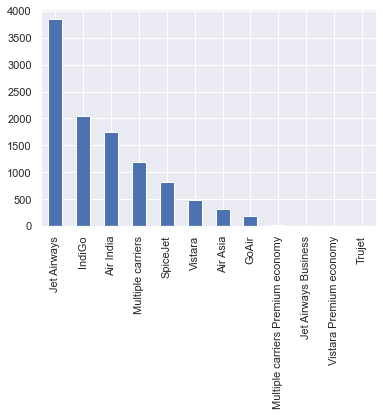

In [184]:
train['Airline'].value_counts().plot(kind='bar')

<AxesSubplot:>

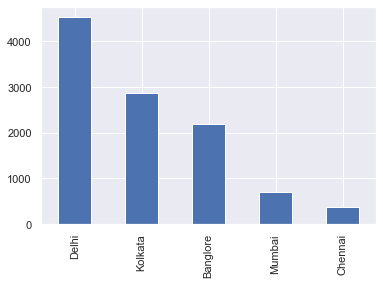

In [185]:
train['Source'].value_counts().plot(kind='bar')

<AxesSubplot:>

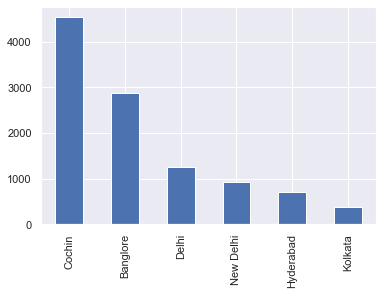

In [186]:
train['Destination'].value_counts().plot(kind='bar')

<AxesSubplot:>

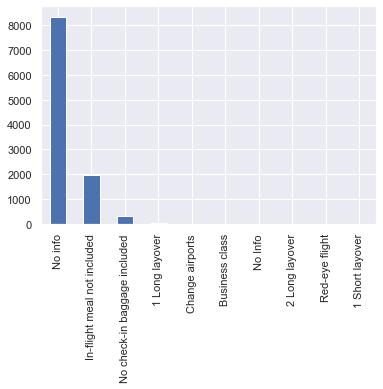

In [187]:
train['Additional_Info'].value_counts().plot(kind='bar')

In [188]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

# datetime datatypes

clean both train and test object at a time 

In [189]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'], infer_datetime_format=True)
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], infer_datetime_format=True)

In [190]:
train['year_of_journey'] = train['Date_of_Journey'].dt.year
train['days_of_journey'] = train['Date_of_Journey'].dt.dayofweek
train['month_of_journey'] = train['Date_of_Journey'].dt.month

In [191]:
test['year_of_journey'] = test['Date_of_Journey'].dt.year
test['days_of_journey'] = test['Date_of_Journey'].dt.dayofweek
test['month_of_journey'] = test['Date_of_Journey'].dt.month

In [192]:
# converting DEP_Time to minutes
train["Dep_Time"] = train["Dep_Time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
test["Dep_Time"] = test["Dep_Time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# see the duration and arrival time



The error has to be split for better preprocessing of both columns

In [193]:
# new data frame with split value columns 
new = train["Duration"].str.split(" ", n = 1, expand = True)

In [194]:
train['Duration_hour'] = new[0]

In [195]:
train['Duration_minute'] = new[1]

In [196]:
new_test = test["Duration"].str.split(" ", n = 1, expand = True) 
test["Duration_hour"] = new_test[0]
test["Duration_minute"] = new_test[1]

In [197]:
new1 = train["Arrival_Time"].str.split(" ", n = 1, expand =True) 

In [198]:
train['Arrival_time'] = new1[0]
train['Arrival_date'] = new1[1]

In [199]:
train['Arrival_time'] = train['Arrival_time'].astype('object')

In [200]:
train['Arrival_date'] = train['Arrival_date'].astype('object')

In [201]:
train["Arrival_time"] = train["Arrival_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [202]:
new1_test = test["Arrival_Time"].str.split(" ", n = 1, expand =True) 
test['Arrival_time'] = new1_test[0]
test['Arrival_date'] = new1_test[1]

In [203]:
test['Arrival_time'] = test['Arrival_time'].astype('object')
test['Arrival_date'] = test['Arrival_date'].astype('object')

In [204]:
test["Arrival_time"] = test["Arrival_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [205]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Duration_hour,Duration_minute,Arrival_time,Arrival_date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,6,3,2h,50m,70,22 Mar
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,7h 25m,2 stops,No info,7662,2019,2,5,7h,25m,795,None
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,6,19h,None,265,10 Jun
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,5h 25m,1 stop,No info,6218,2019,6,5,5h,25m,1410,None
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,4h 45m,1 stop,No info,13302,2019,4,3,4h,45m,1295,None


clean duration minute

In [206]:
train['Duration_hour'] = train['Duration_hour'].astype('object')
train['Duration_minute'] = train['Duration_minute'].astype('object')
# for test data
test['Duration_hour'] = test['Duration_hour'].astype('object')
test['Duration_minute'] = test['Duration_minute'].astype('object')

In [207]:
train['Duration_hour'] = train['Duration_hour'].replace({'2h':'02', '7h':'07', '19h':'19', '5h':'05', '4h':'04', '15h':'15', '21h':'21', '25h':'25'
                                , '13h':'13', '12h':'12',
       '26h':'26', '22h':'22', '23h':'23', '20h':'20', '10h':'10', '6h':'06', '11h':'11', '8h':'08', '16h':'16', '3h':'03',
       '27h':'27', '1h':'01', '14h':'14', '9h':'09', '18h':'18', '17h':'17', '24h':"24", '30h':"30", '28h':"28", '29h':"29",
       '37h':"37", '34h':"34", '38h':"38", '35h':"35", '36h':"36", '47h':"47", '33h':"33", '32h':"32", '31h':"31",
       '42h':"42", '39h':"39", '5m':"05", '41h':"41", '40h':"40"})

In [208]:
train['Duration_minute'] = train['Duration_minute'].replace({'50m':"50", '25m':"25", None:'00', '45m':"45", '30m':"30", '5m':"05", '15m':"15", '35m':"35", '10m':"10", 
                                  '20m':"20",
                                '55m':"55", '40m':"40"})

In [209]:
test['Duration_hour'] = test['Duration_hour'].replace({'10h':'10', '4h':'04', '23h':'23', '13h':'13', '2h':'02', '18h':'18', '15h':'15', '5h':'05', '6h':'06', '28h':'28',
                                                    '9h':'09','17h':'17','12h':'12', '14h':'14', '11h':'11', '25h':'25', '19h':'19', '7h':'07', '3h':'03', '1h':'01',
                                                      '27h':'27', '26h':'26', '8h':'08', '21h':'21', '16h':'16', '22h':'22', '33h':'33', '24h':'24', '38h':'38', '20h':'20',
                                                      '35h':'35', '31h':'31', '34h':'34', '29h':'29', '30h':'30', '37h':'37', '36h':'36', '39h':'39', '32h':'32',
                                                      '40h':'40', '5m':'05'})

In [210]:
test['Duration_minute'] = test['Duration_minute'].replace({'55m':'55', None:'00', '45m':'45', '50m':'50', '20m':'20', '5m':'05', '15m':'15',
                                                          '40m':'40', '10m':'10', '35m':'35',
                                                          '30m':'30', '25m':'25'})

head DataFrame

In [211]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Duration_hour,Duration_minute,Arrival_time,Arrival_date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,6,3,02,50,70,22 Mar
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,7h 25m,2 stops,No info,7662,2019,2,5,07,25,795,None
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,6,19,00,265,10 Jun
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,5h 25m,1 stop,No info,6218,2019,6,5,05,25,1410,None
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,4h 45m,1 stop,No info,13302,2019,4,3,04,45,1295,None


In [212]:
# concating
train['duration'] = train['Duration_hour'] + ':' + train['Duration_minute']
test['duration'] = test['Duration_hour'] + ':' + test['Duration_minute']

In [213]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Duration_hour,Duration_minute,Arrival_time,Arrival_date,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,6,3,02,50,70,22 Mar,02:50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,7h 25m,2 stops,No info,7662,2019,2,5,07,25,795,None,07:25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,6,19,00,265,10 Jun,19:00
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,5h 25m,1 stop,No info,6218,2019,6,5,05,25,1410,None,05:25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,4h 45m,1 stop,No info,13302,2019,4,3,04,45,1295,None,04:45


In [214]:
train["duration"] = train["duration"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
test["duration"] = test["duration"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [215]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Duration_hour,Duration_minute,Arrival_time,Arrival_date,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,6,3,02,50,70,22 Mar,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,7h 25m,2 stops,No info,7662,2019,2,5,07,25,795,None,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,6,19,00,265,10 Jun,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,5h 25m,1 stop,No info,6218,2019,6,5,05,25,1410,None,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,4h 45m,1 stop,No info,13302,2019,4,3,04,45,1295,None,285


Cleaning the data into minute

In [216]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10683 non-null  object        
 1   Date_of_Journey   10683 non-null  datetime64[ns]
 2   Source            10683 non-null  object        
 3   Destination       10683 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10683 non-null  int64         
 6   Arrival_Time      10683 non-null  object        
 7   Duration          10683 non-null  object        
 8   Total_Stops       10682 non-null  object        
 9   Additional_Info   10683 non-null  object        
 10  Price             10683 non-null  int64         
 11  year_of_journey   10683 non-null  int64         
 12  days_of_journey   10683 non-null  int64         
 13  month_of_journey  10683 non-null  int64         
 14  Duration_hour     1068

# droping unneccessary column

In [217]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'year_of_journey', 'days_of_journey',
       'month_of_journey', 'Duration_hour', 'Duration_minute', 'Arrival_time',
       'Arrival_date', 'duration'],
      dtype='object')

In [218]:
train.drop(['Arrival_date','Arrival_Time', 'Duration','Duration_hour', 'Duration_minute'], axis=1, inplace=True)

In [219]:
test.drop(['Arrival_date','Arrival_Time', 'Duration','Duration_hour', 'Duration_minute'], axis=1, inplace=True)

# checking the clean data

In [220]:
# import the data to my csv file
#train.to_csv('India_flight_train.csv', index=False)#
#test.to_csv('India_flight_test.csv', index=False)

data exploration

In [221]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Arrival_time,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,non-stop,No info,3897,2019,6,3,70,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,2 stops,No info,7662,2019,2,5,795,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,2 stops,No info,13882,2019,6,6,265,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,1 stop,No info,6218,2019,6,5,1410,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,1 stop,No info,13302,2019,4,3,1295,285


<AxesSubplot:>

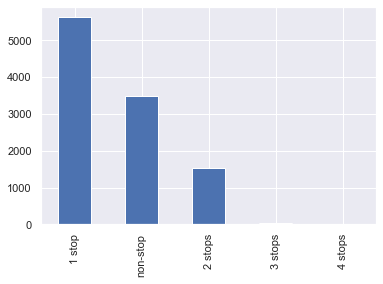

In [222]:
train['Total_Stops'].value_counts().plot(kind='bar')

<AxesSubplot:>

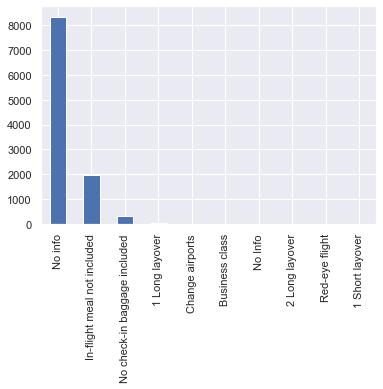

In [223]:
train['Additional_Info'].value_counts().plot(kind='bar')

In [224]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [225]:
# Aditional info has To be Argumented
train['Additional_Info'] = train['Additional_Info'].replace({'No Info':'No info'})

In [226]:
test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [227]:
test['Additional_Info'] = [1 if values == 'No info' else 0 for values in test['Additional_Info']]

In [228]:
# list comprehension to argument
train['Additional_Info'] = [1 if values == 'No info' else 0 for values in train['Additional_Info']]

In [229]:
train['Additional_Info'].value_counts()

1    8348
0    2335
Name: Additional_Info, dtype: int64

In [230]:
train['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

# Digging insight Explanatory Data Analysis

<AxesSubplot:>

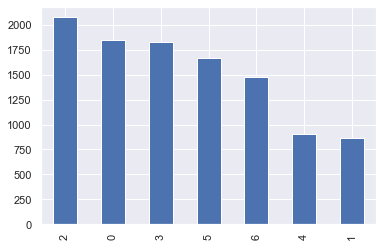

In [231]:
train['days_of_journey'].value_counts().plot(kind='bar')

In [232]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'year_of_journey', 'days_of_journey', 'month_of_journey',
       'Arrival_time', 'duration'],
      dtype='object')

<AxesSubplot:>

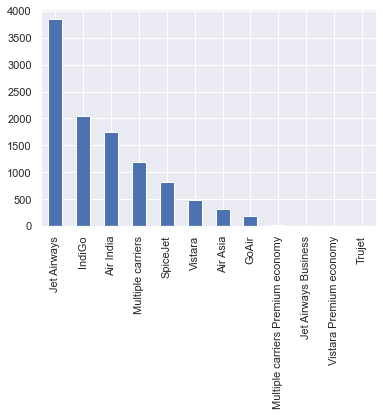

In [233]:
train['Airline'].value_counts().plot(kind='bar')

<AxesSubplot:>

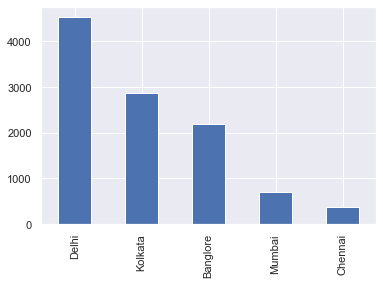

In [234]:
train['Source'].value_counts().plot(kind='bar')

<AxesSubplot:>

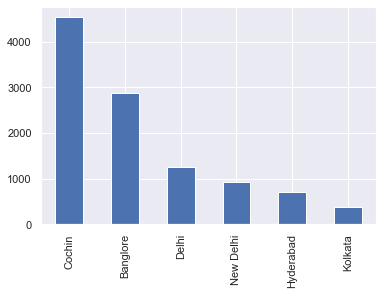

In [235]:
train['Destination'].value_counts().plot(kind='bar')

In [236]:
train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXZ → MAA → BLR       1
BOM → UDR → DEL → HYD       1
CCU → VTZ → BLR             1
BOM → JLR → HYD             1
BOM → CCU → HYD             1
Name: Route, Length: 128, dtype: int64

using crosstab

In [237]:
pd.crosstab(train['days_of_journey'], train['Airline'], margins=True)

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,All
days_of_journey,,,,,,,,,,,,,
0,50,270,35,349,698,0,221,0,147,0,80,0,1850
1,26,162,10,140,344,0,81,0,67,0,39,0,869
2,59,348,38,384,730,1,283,0,138,1,97,0,2079
3,47,285,22,304,711,0,265,13,122,0,63,0,1832
4,32,178,21,218,286,4,11,0,109,0,49,1,909
5,56,249,33,355,562,0,228,0,123,0,63,1,1670
6,49,260,35,303,518,1,107,0,112,0,88,1,1474
All,319,1752,194,2053,3849,6,1196,13,818,1,479,3,10683


In [238]:
pd.crosstab(train['Airline'],train['days_of_journey'], margins=True)

days_of_journey,0,1,2,3,4,5,6,All
Airline,,,,,,,,
Air Asia,50,26,59,47,32,56,49,319
Air India,270,162,348,285,178,249,260,1752
GoAir,35,10,38,22,21,33,35,194
IndiGo,349,140,384,304,218,355,303,2053
Jet Airways,698,344,730,711,286,562,518,3849
Jet Airways Business,0,0,1,0,4,0,1,6
Multiple carriers,221,81,283,265,11,228,107,1196
Multiple carriers Premium economy,0,0,0,13,0,0,0,13
SpiceJet,147,67,138,122,109,123,112,818


In [239]:
pd.crosstab(train['Source'],train['Destination'], margins=True)

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,All
Source,,,,,,,
Banglore,0,0,1265,0,0,932,2197
Chennai,0,0,0,0,381,0,381
Delhi,0,4537,0,0,0,0,4537
Kolkata,2871,0,0,0,0,0,2871
Mumbai,0,0,0,697,0,0,697
All,2871,4537,1265,697,381,932,10683


In [240]:
pd.crosstab(train['Airline'],train['Destination'], margins=True)

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,All
Airline,,,,,,,
Air Asia,150,80,71,0,0,18,319
Air India,512,747,120,136,25,212,1752
GoAir,25,76,69,0,0,24,194
IndiGo,445,705,366,196,184,157,2053
Jet Airways,1256,1586,370,219,0,418,3849
Jet Airways Business,0,2,0,0,0,4,6
Multiple carriers,0,1196,0,0,0,0,1196
Multiple carriers Premium economy,0,13,0,0,0,0,13
SpiceJet,300,87,137,122,128,44,818


In [241]:
pd.crosstab(train['Airline'],train['Source'], margins=True)

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai,All
Airline,,,,,,
Air Asia,89,0,80,150,0,319
Air India,332,25,747,512,136,1752
GoAir,93,0,76,25,0,194
IndiGo,523,184,705,445,196,2053
Jet Airways,788,0,1586,1256,219,3849
Jet Airways Business,4,0,2,0,0,6
Multiple carriers,0,0,1196,0,0,1196
Multiple carriers Premium economy,0,0,13,0,0,13
SpiceJet,181,128,87,300,122,818


Airline
Air Asia                             AxesSubplot(0.125,0.125;0.775x0.755)
Air India                            AxesSubplot(0.125,0.125;0.775x0.755)
GoAir                                AxesSubplot(0.125,0.125;0.775x0.755)
IndiGo                               AxesSubplot(0.125,0.125;0.775x0.755)
Jet Airways                          AxesSubplot(0.125,0.125;0.775x0.755)
Jet Airways Business                 AxesSubplot(0.125,0.125;0.775x0.755)
Multiple carriers                    AxesSubplot(0.125,0.125;0.775x0.755)
Multiple carriers Premium economy    AxesSubplot(0.125,0.125;0.775x0.755)
SpiceJet                             AxesSubplot(0.125,0.125;0.775x0.755)
Trujet                               AxesSubplot(0.125,0.125;0.775x0.755)
Vistara                              AxesSubplot(0.125,0.125;0.775x0.755)
Vistara Premium economy              AxesSubplot(0.125,0.125;0.775x0.755)
Name: Price, dtype: object

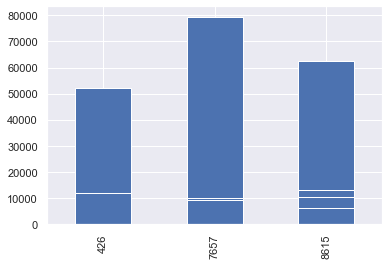

In [242]:
train.groupby('Airline')['Price'].plot(kind='bar')

<AxesSubplot:xlabel='Airline'>

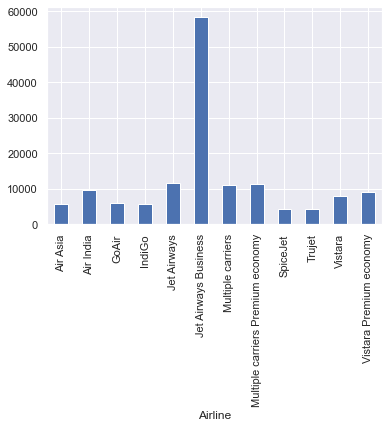

In [243]:
train.groupby('Airline')['Price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Airline'>

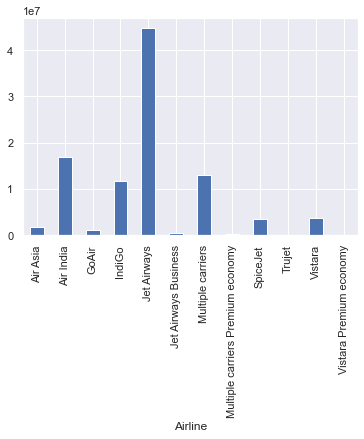

In [244]:
train.groupby('Airline')['Price'].sum().plot(kind='bar')

Cleaning the data

In [245]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'year_of_journey', 'days_of_journey', 'month_of_journey',
       'Arrival_time', 'duration'],
      dtype='object')

In [246]:
# list comprehension to argument
train['Total_Stops'] = [1 if values == 'non-stop' else 0 for values in train['Total_Stops']]

In [247]:
# list comprehension to argument
test['Total_Stops'] = [1 if values == 'non-stop' else 0 for values in test['Total_Stops']]

In [248]:
train['Airline'] = train['Airline'].astype('category')
# for test data
test['Airline'] = test['Airline'].astype('category')

In [249]:
train['Airline'] = train['Airline'].cat.codes
# for test data
test['Airline'] = test['Airline'].cat.codes

In [250]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Arrival_time,duration
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,1,1,3897,2019,6,3,70,170
1,1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,0,1,7662,2019,2,5,795,445
2,4,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,0,1,13882,2019,6,6,265,1140
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,0,1,6218,2019,6,5,1410,325
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,0,1,13302,2019,4,3,1295,285


In [251]:
train.corr()['Price']

Airline            -0.039520
Dep_Time            0.005485
Total_Stops        -0.613760
Additional_Info     0.022086
Price               1.000000
year_of_journey          NaN
days_of_journey     0.051613
month_of_journey   -0.103651
Arrival_time        0.020921
duration            0.506495
Name: Price, dtype: float64

<AxesSubplot:xlabel='Source,Destination'>

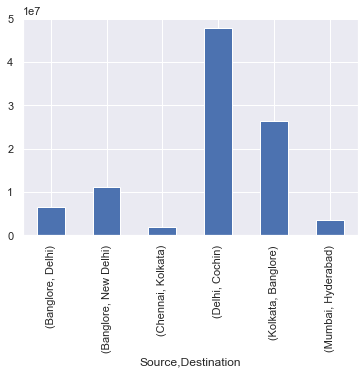

In [252]:
train.groupby(['Source', 'Destination'])['Price'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Source,Destination,Total_Stops'>

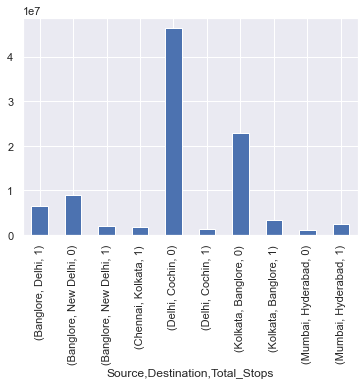

In [253]:
train.groupby(['Source', 'Destination', 'Total_Stops'])['Price'].sum().plot(kind='bar')

In [254]:
te = train.groupby(['Source', 'Destination', 'Total_Stops'])['Price'].agg(['mean'])

In [255]:
te.columns = ['mean_price_DST']

In [256]:
train['Dep_Time'].describe()

count    10683.000000
mean       773.852382
std        344.964055
min         20.000000
25%        480.000000
50%        710.000000
75%       1085.000000
max       1435.000000
Name: Dep_Time, dtype: float64

In [257]:
train['Arrival_time'].describe()

count    10683.000000
mean       825.617336
std        409.324620
min          5.000000
25%        525.000000
50%        845.000000
75%       1155.000000
max       1435.000000
Name: Arrival_time, dtype: float64

In [258]:
train['duration'].describe()

count    10683.000000
mean       643.120846
std        507.835322
min         75.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: duration, dtype: float64

In [259]:
def convert_time(tim):
    if tim < 720:
        return 'AM'
    elif tim == 720:
        return 'NOON'
    else:
        return 'PM'

In [260]:
def convert_dur(dur):
    if dur < 1430:
        return 'fast'
    elif dur == 1430:
        return 'middle'
    else:
        return 'slow'

In [261]:
train['Time_Zone_Dep'] = train['Dep_Time'].apply(convert_time)

In [262]:
test['Time_Zone_Dep'] = test['Dep_Time'].apply(convert_time)

In [263]:
train['Time_Zone_Arr'] = train['Arrival_time'].apply(convert_time)
test['Time_Zone_Arr'] = test['Arrival_time'].apply(convert_time)

In [264]:
train['Time_Zone_Arr'] = train['Arrival_time'].apply(convert_time)
test['Time_Zone_Arr'] = test['Arrival_time'].apply(convert_time)

In [265]:
train['duration_len'] = train['duration'].apply(convert_dur)
test['duration_len'] = test['duration'].apply(convert_dur)

<AxesSubplot:>

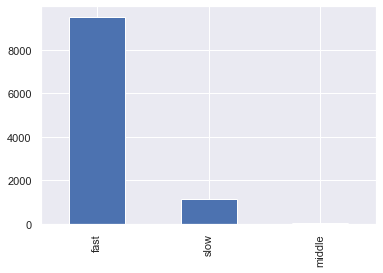

In [266]:
train['duration_len'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='duration_len'>

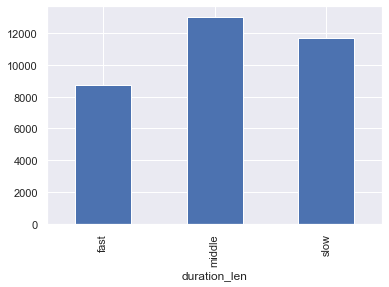

In [267]:
train.groupby('duration_len')['Price'].agg(np.mean).plot(kind='bar')

In [268]:
train.Destination.value_counts(), train.Source.value_counts()

(Cochin       4537
 Banglore     2871
 Delhi        1265
 New Delhi     932
 Hyderabad     697
 Kolkata       381
 Name: Destination, dtype: int64,
 Delhi       4537
 Kolkata     2871
 Banglore    2197
 Mumbai       697
 Chennai      381
 Name: Source, dtype: int64)

In [269]:
def SD(sou, des):
    if sou =='Banglore' and des == 'Delhi':
        return 'Banglore-Delhi'
    elif sou =='Banglore' and des == 'New Delhi':
        return 'Banglore-New_Delhi'
    elif sou == 'Chennai' and des == 'Kolkata':
        return 'Chennai-Kolkata'
    elif sou == 'Delhi' and des == 'Cochin':
        return 'Delhi-Cochin'
    elif sou == 'Kolkata' and des == 'Banglore':
        return 'Kolkata-Banglore'
    else:
        return 'Mumbai-Hyderabad'

In [270]:
train['sou_des'] = train['Source'] + ' ' + train['Destination']

In [271]:
test['sou_des'] = test['Source'] + ' ' + test['Destination']

In [272]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Arrival_time,duration,Time_Zone_Dep,Time_Zone_Arr,duration_len,sou_des
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,1,1,3897,2019,6,3,70,170,PM,AM,fast,Banglore New Delhi
1,1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,0,1,7662,2019,2,5,795,445,AM,PM,fast,Kolkata Banglore
2,4,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,0,1,13882,2019,6,6,265,1140,AM,AM,fast,Delhi Cochin
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,0,1,6218,2019,6,5,1410,325,PM,PM,fast,Kolkata Banglore
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,0,1,13302,2019,4,3,1295,285,PM,PM,fast,Banglore New Delhi


In [273]:
train.sou_des.value_counts()

Delhi Cochin          4537
Kolkata Banglore      2871
Banglore Delhi        1265
Banglore New Delhi     932
Mumbai Hyderabad       697
Chennai Kolkata        381
Name: sou_des, dtype: int64

In [274]:
distance = {'Delhi Cochin':2081.78, 'Kolkata Banglore':1559, 'Banglore Delhi':1700, 'Mumbai Hyderabad':622,
      'Chennai Kolkata':1380, 'Banglore New Delhi':1700}

In [275]:
train['sou_des'] = train['sou_des'].map(distance)

In [276]:
test['sou_des'] = test['sou_des'].map(distance)

In [277]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Arrival_time,duration,Time_Zone_Dep,Time_Zone_Arr,duration_len,sou_des
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,1,1,3897,2019,6,3,70,170,PM,AM,fast,1700.00
1,1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,0,1,7662,2019,2,5,795,445,AM,PM,fast,1559.00
2,4,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,0,1,13882,2019,6,6,265,1140,AM,AM,fast,2081.78
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,0,1,6218,2019,6,5,1410,325,PM,PM,fast,1559.00
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,0,1,13302,2019,4,3,1295,285,PM,PM,fast,1700.00


In [278]:
train.corr()['Price']

Airline            -0.039520
Dep_Time            0.005485
Total_Stops        -0.613760
Additional_Info     0.022086
Price               1.000000
year_of_journey          NaN
days_of_journey     0.051613
month_of_journey   -0.103651
Arrival_time        0.020921
duration            0.506495
sou_des             0.321925
Name: Price, dtype: float64

In [279]:
dur_len = {'fast':2, 'middle':1, 'slow':0}

In [280]:
train['duration_len'] = train['duration_len'].map(dur_len)
test['duration_len'] = test['duration_len'].map(dur_len)

In [281]:
pd.crosstab(train['Time_Zone_Dep'], train['Time_Zone_Arr'], margins=True)

Time_Zone_Arr,AM,NOON,PM,All
Time_Zone_Dep,,,,
AM,2159,70,3148,5377
NOON,31,0,67,98
PM,1898,65,3245,5208
All,4088,135,6460,10683


In [282]:
train['time_zone'] = train['Time_Zone_Dep'] + ' ' + train['Time_Zone_Arr']
test['time_zone'] = test['Time_Zone_Dep'] + ' ' + test['Time_Zone_Arr']

In [283]:
train['Time_Zone_Dep'] = train['Time_Zone_Dep'].astype('category')
test['Time_Zone_Dep'] = test['Time_Zone_Dep'].astype('category')

In [284]:
train['Time_Zone_Dep'] = train['Time_Zone_Dep'].cat.codes
test['Time_Zone_Dep'] = test['Time_Zone_Dep'].cat.codes

In [285]:
train['time_zone'] = train['time_zone'].astype('category')
test['time_zone'] = test['time_zone'].astype('category')

In [286]:
train['time_zone'] = train['time_zone'].cat.codes
test['time_zone'] = test['time_zone'].cat.codes

In [287]:
arr = {'AM':1, 'NOON':2, 'PM':3}

In [288]:
train['Time_Zone_Arr'] = train['Time_Zone_Arr'].map(arr)

In [289]:
test['Time_Zone_Arr'] = test['Time_Zone_Arr'].map(arr)

In [290]:
train['Route'] = train['Route'].astype('category')
test['Route'] = test['Route'].astype('category')

In [291]:
train['Route'] = train['Route'].cat.codes
test['Route'] = test['Route'].cat.codes

In [292]:
train  = pd.get_dummies(data=train)

In [293]:
test = pd.get_dummies(data=test)

In [294]:
#train['Source'] = train['Source'].astype('category')
#test['Source'] = test['Source'].astype('category')

In [295]:
#train['Source'] = train['Source'].cat.codes
#test['Source'] = test['Source'].cat.codes

In [296]:
#train['Destination'] = train['Destination'].astype('category')
#test['Destination'] = test['Destination'].astype('category')

In [297]:
#train['Destination'] = train['Destination'].cat.codes
#test['Destination'] = test['Destination'].cat.codes

# droping features

In [298]:
train.shape

(10683, 28)

In [299]:
test.shape

(2671, 27)

In [300]:
train.corr()['Price']

Airline                 -0.039520
Route                    0.164183
Dep_Time                 0.005485
Total_Stops             -0.613760
Additional_Info          0.022086
Price                    1.000000
year_of_journey               NaN
days_of_journey          0.051613
month_of_journey        -0.103651
Arrival_time             0.020921
duration                 0.506495
Time_Zone_Dep            0.004502
Time_Zone_Arr            0.039335
duration_len            -0.197802
sou_des                  0.321925
time_zone                0.018734
Source_Banglore         -0.118026
Source_Chennai          -0.179216
Source_Delhi             0.270619
Source_Kolkata           0.009377
Source_Mumbai           -0.230745
Destination_Banglore     0.009377
Destination_Cochin       0.270619
Destination_Delhi       -0.313401
Destination_Hyderabad   -0.230745
Destination_Kolkata     -0.179216
Destination_New Delhi    0.189785
Name: Price, dtype: float64

In [301]:
#train.drop(['Date_of_Journey','Source', 'Destination', 'year_of_journey', 'days_of_journey','Time_Zone_Dep', 'Time_Zone_Arr', 'time_zone'], axis=1, inplace=True)

In [302]:
train.drop(['Date_of_Journey','year_of_journey'], axis=1, inplace=True)
test.drop(['Date_of_Journey','year_of_journey'], axis=1, inplace=True)

In [303]:
## for test set
#test.drop(['Date_of_Journey','Source', 'Destination', 'year_of_journey', 'days_of_journey','Time_Zone_Dep', 'Time_Zone_Arr', 'time_zone'], axis=1, inplace=True)

In [304]:
train.head()

,Airline,Route,Dep_Time,Total_Stops,Additional_Info,Price,days_of_journey,month_of_journey,Arrival_time,duration,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,18,1340,1,1,3897,6,3,70,170,...,0,0,0,0,0,0,0,0,0,1
1,1,84,350,0,1,7662,2,5,795,445,...,0,0,1,0,1,0,0,0,0,0
2,4,118,565,0,1,13882,6,6,265,1140,...,0,1,0,0,0,1,0,0,0,0
3,3,91,1085,0,1,6218,6,5,1410,325,...,0,0,1,0,1,0,0,0,0,0
4,3,29,1010,0,1,13302,4,3,1295,285,...,0,0,0,0,0,0,0,0,0,1


In [305]:
test.head()

,Airline,Route,Dep_Time,Total_Stops,Additional_Info,days_of_journey,month_of_journey,Arrival_time,duration,Time_Zone_Dep,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,76,1050,0,1,3,6,265,655,2,...,0,1,0,0,0,1,0,0,0,0
1,3,65,380,0,1,3,12,620,240,0,...,0,0,1,0,1,0,0,0,0,0
2,4,76,1155,0,0,1,5,1140,1425,2,...,0,1,0,0,0,1,0,0,0,0
3,6,76,480,0,1,1,5,1260,780,0,...,0,1,0,0,0,1,0,0,0,0
4,0,16,1435,1,1,0,6,165,170,2,...,0,0,0,0,0,0,1,0,0,0


In [130]:
train['sd'] = train['sou_des'] * train['duration']

In [131]:
test['sd'] = test['sou_des'] * train['duration']

In [132]:
train['ro_mo_stop'] = (train['Route'] * train['Total_Stops']) / train['month_of_journey']

In [133]:
test['ro_mo_stop'] = (test['Route'] * test['Total_Stops']) / test['month_of_journey']

droping low correlation features and unneccesary object datatype

In [134]:
## increasing figure 
sns.set(rc={'figure.figsize':(10,5)})

In [135]:
train['gr'] = train['sou_des'] * train['duration']
test['gr'] = test['sou_des'] * test['duration']

In [136]:
train['avg_dur_arr'] = (train['Arrival_time'] * train['duration']) *100
test['avg_dur_arr'] = (test['Arrival_time'] * test['duration']) *100

In [137]:
train['arr_dep'] = (train['Arrival_time'] - train['Dep_Time']) * train['duration_len']
test['arr_dep'] = (test['Arrival_time'] - test['Dep_Time']) * test['duration_len']

In [138]:
train['rou_mo'] = train['month_of_journey'] * train['Route']
test['rou_mo'] = test['month_of_journey'] * test['Route']

In [139]:
train['d_m'] = train['duration'] * train['month_of_journey']
test['d_m'] = test['duration'] * test['month_of_journey']

In [140]:
train['To_Re'] = train['Total_Stops'] * train['Route']
test['To_Re'] = test['Total_Stops'] * test['Route']

In [141]:
train.head()

,Airline,Route,Dep_Time,Total_Stops,Additional_Info,Price,days_of_journey,month_of_journey,Arrival_time,duration,...,Destination_Kolkata,Destination_New Delhi,sd,ro_mo_stop,gr,avg_dur_arr,arr_dep,rou_mo,d_m,To_Re
0,3,18,1340,1,1,3897,6,3,70,170,...,0,1,289000.0,6.0,289000.0,1190000,-2540,54,510,18
1,1,84,350,0,1,7662,2,5,795,445,...,0,0,693755.0,0.0,693755.0,35377500,890,420,2225,0
2,4,118,565,0,1,13882,6,6,265,1140,...,0,0,2373229.2,0.0,2373229.2,30210000,-600,708,6840,0
3,3,91,1085,0,1,6218,6,5,1410,325,...,0,0,506675.0,0.0,506675.0,45825000,650,455,1625,0
4,3,29,1010,0,1,13302,4,3,1295,285,...,0,1,484500.0,0.0,484500.0,36907500,570,87,855,0


In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                2671 non-null   int8   
 1   Route                  2671 non-null   int8   
 2   Dep_Time               2671 non-null   int64  
 3   Total_Stops            2671 non-null   int64  
 4   Additional_Info        2671 non-null   int64  
 5   days_of_journey        2671 non-null   int64  
 6   month_of_journey       2671 non-null   int64  
 7   Arrival_time           2671 non-null   int64  
 8   duration               2671 non-null   int64  
 9   Time_Zone_Dep          2671 non-null   int8   
 10  Time_Zone_Arr          2671 non-null   int64  
 11  duration_len           2671 non-null   int64  
 12  sou_des                2671 non-null   float64
 13  time_zone              2671 non-null   int8   
 14  Source_Banglore        2671 non-null   uint8  
 15  Sour

In [143]:
train['r_i_m'] = (train['Route'] * train['month_of_journey'] * train['duration'])
test['r_i_m'] = (test['Route'] * test['month_of_journey'] * test['duration'])

<AxesSubplot:>

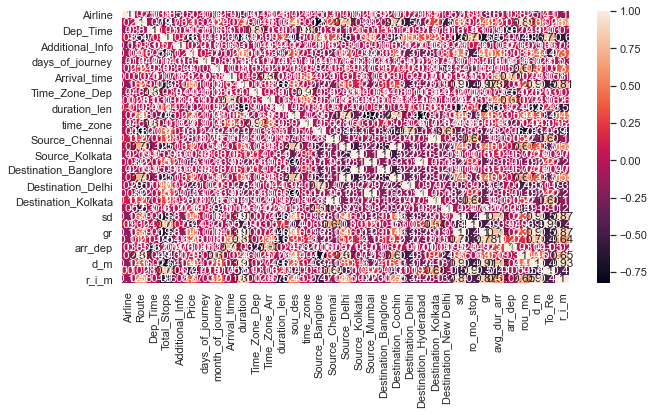

In [144]:
sns.heatmap(train.corr(), annot=True)

In [145]:
train.shape

(10683, 35)

In [146]:
test.shape

(2671, 34)

In [147]:
train.describe()

,Airline,Route,Dep_Time,Total_Stops,Additional_Info,Price,days_of_journey,month_of_journey,Arrival_time,duration,...,Destination_New Delhi,sd,ro_mo_stop,gr,avg_dur_arr,arr_dep,rou_mo,d_m,To_Re,r_i_m
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,1.068300e+04,10683.000000,1.068300e+04,1.068300e+04,10683.000000,10683.000000,10683.000000,10683.000000,1.068300e+04
mean,3.965927,74.813067,773.852382,0.326781,0.781428,9087.064121,2.934850,4.708602,825.617336,643.120846,...,0.087241,1.182511e+06,3.766907,1.182511e+06,5.411423e+07,72.073388,362.704203,3036.945615,16.385379,2.610009e+05
std,2.352155,36.734645,344.964055,0.469058,0.413297,4611.359167,2.006698,1.164357,409.324620,507.835322,...,0.282202,9.766783e+05,7.588137,9.766783e+05,5.420086e+07,1043.751281,207.183286,2553.185195,31.455628,2.653211e+05
min,0.000000,-1.000000,20.000000,0.000000,0.000000,1759.000000,0.000000,3.000000,5.000000,75.000000,...,0.000000,4.665000e+04,0.000000,4.665000e+04,8.000000e+04,-2710.000000,-5.000000,225.000000,0.000000,-7.100000e+03
25%,3.000000,48.000000,480.000000,0.000000,1.000000,5277.000000,1.000000,3.000000,525.000000,170.000000,...,0.000000,2.975000e+05,0.000000,2.975000e+05,1.258000e+07,-290.000000,198.000000,875.000000,0.000000,2.592000e+04
50%,4.000000,73.000000,710.000000,0.000000,1.000000,8372.000000,3.000000,5.000000,845.000000,520.000000,...,0.000000,9.680277e+05,0.000000,9.680277e+05,3.638250e+07,300.000000,335.000000,2295.000000,0.000000,1.903200e+05
75%,4.000000,104.000000,1085.000000,1.000000,1.000000,12373.000000,5.000000,6.000000,1155.000000,930.000000,...,0.000000,1.759104e+06,3.600000,1.759104e+06,7.875000e+07,690.000000,520.000000,4470.000000,18.000000,4.009500e+05
max,11.000000,127.000000,1435.000000,1.000000,1.000000,79512.000000,6.000000,6.000000,1435.000000,2860.000000,...,1.000000,5.953891e+06,42.333333,5.953891e+06,3.459600e+08,2810.000000,762.000000,13770.000000,127.000000,1.696320e+06


In [148]:
scale = StandardScaler()

In [149]:
import warnings
warnings.filterwarnings("ignore")

In [150]:
from scipy.stats import boxcox

In [151]:
train.corr()['Price']

Airline                 -0.039520
Route                    0.164183
Dep_Time                 0.005485
Total_Stops             -0.613760
Additional_Info          0.022086
Price                    1.000000
days_of_journey          0.051613
month_of_journey        -0.103651
Arrival_time             0.020921
duration                 0.506495
Time_Zone_Dep            0.004502
Time_Zone_Arr            0.039335
duration_len            -0.197802
sou_des                  0.321925
time_zone                0.018734
Source_Banglore         -0.118026
Source_Chennai          -0.179216
Source_Delhi             0.270619
Source_Kolkata           0.009377
Source_Mumbai           -0.230745
Destination_Banglore     0.009377
Destination_Cochin       0.270619
Destination_Delhi       -0.313401
Destination_Hyderabad   -0.230745
Destination_Kolkata     -0.179216
Destination_New Delhi    0.189785
sd                       0.496832
ro_mo_stop              -0.439029
gr                       0.496832
avg_dur_arr   

modelling

In [152]:
X = train.drop('Price', axis=1)
y = train['Price']

In [153]:
from sklearn.linear_model import Ridge

In [154]:
from sklearn.tree import DecisionTreeRegressor

In [155]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

In [156]:
#train.to_csv('wedT.csv', index=False)
#test.to_csv('wedTe.csv', index=False)

In [158]:
model = RandomForestRegressor(n_estimators=390, criterion='mse', max_depth=20, min_samples_split=2,min_samples_leaf=1 ,max_features='auto',bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)



In [159]:
model1 = DecisionTreeRegressor(random_state=42)

max voting Stacking

In [170]:

model = BaggingRegressor(GradientBoostingRegressor())

In [171]:
model.fit(X,y)
model1.fit(X, y)

LogisticRegression(random_state=1)

In [172]:
pred1=model.predict(X)
pred2=model1.predict(X)



In [173]:
final_pred = np.array([])
for i in range(0,len(X)):
    final_pred = np.append(final_pred, ([pred1[i], pred2[i]]))

In [174]:
final_pred

array([ 6607.5454128 , 10262.        ,  9436.34307303, ...,
       10262.        ,  9626.87254836, 10844.        ])

In [175]:
from sklearn.linear_model import LogisticRegression


Sklearn

In [177]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

NameError: name 'model2' is not defined